In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [40]:
data = pd.read_csv(r"C:\Users\HPPC\Downloads\AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [41]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [42]:
# Ensure the 'Month' column exists
if 'Month' in data.columns:
    data['Month'] = pd.to_datetime(data['Month'], errors='coerce')  # Convert to datetime, with coercion to handle errors
else:
    print("Column 'Month' not found.")


In [43]:
print(data['Month'].isna().sum())  # Check for any NaT values


0


In [44]:
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)  # Make sure the column exists
data.set_index('Month', inplace=True)  # Set 'Month' as index


In [45]:
data.columns

Index(['Passengers'], dtype='object')

<Axes: xlabel='Month', ylabel='Passengers'>

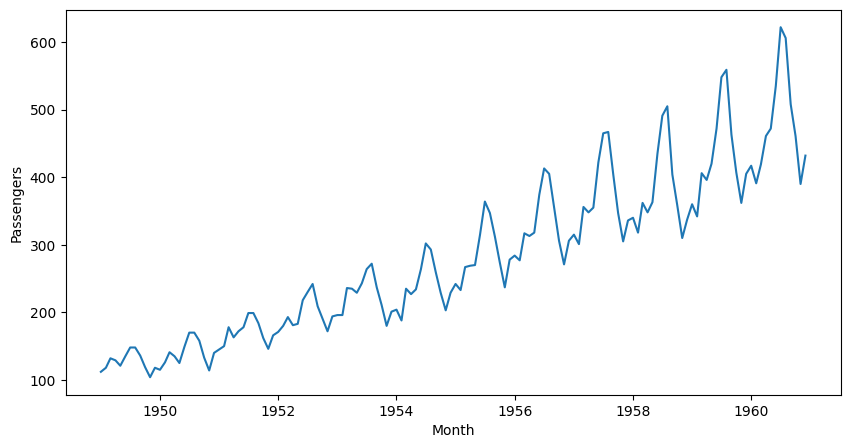

In [46]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = data, x = 'Month', y = 'Passengers')


# Rolling mean

Testing stationarity in the data using the rolling mean

In [47]:
rollmean = data.rolling(window = 12).mean()

rollstd = data.rolling(window = 12).std()

print(rollmean, rollstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


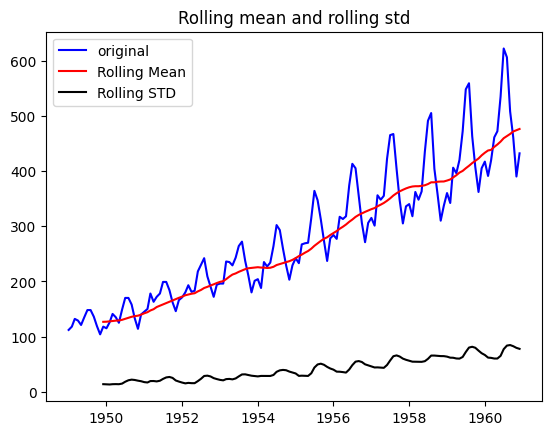

In [48]:
plt.plot(data, color = 'blue', label = 'original')
plt.plot(rollmean, color = 'red', label = 'Rolling Mean' )
plt.plot(rollstd, color = 'black', label = 'Rolling STD')
plt.legend(loc = 'best') #mat automatically places the legend at the best postion to prevent overlapping
plt.title("Rolling mean and rolling std")
plt.show()

Stationarity means that the statistical properties of the data eg the mean and the variance remail constant over time

If the rolling mean is relatively constant and does not trend up or down, it suggests stationarity.

If the rolling mean trends up or down or has a clear pattern, it indicates non-stationarity.

# The Augmented Dickey-Fuller (ADF) test

The Augmented Dickey-Fuller (ADF) test checks for the presence of a unit root, which would indicate non-stationarity.

Null Hypothesis (H₀): The data is non-stationary (contains a unit root).

Alternative Hypothesis (H₁): The data is stationary (no unit root).

ADF Statistic: A negative value of the ADF statistic indicates that the data is likely stationary. The more negative the statistic, the stronger the evidence against the null hypothesis.

p-value: If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude the data is stationary.

Critical Values: These are threshold values for different confidence levels (1%, 5%, 10%). If the ADF statistic is less than the critical value, the null hypothesis is rejected, and the series is stationary.

In [49]:
#performing the ADF test
from statsmodels.tsa.stattools import adfuller

print('Results for the ADF test : ')

adf_test = adfuller(data['Passengers'], autolag= 'AIC')

adf_test_results  = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#lagsUsed','Number of observations used'])#assigns labels to the valuye s for easier readability
for key, value in adf_test[4].items():#key, value: Represents the confidence levels (1%, 5%, 10%) and their corresponding critical values
    adf_test_results[f'Critical Value in percentages ({key})'] = value

print(adf_test_results)



Results for the ADF test : 
Test Statistic                           0.815369
p-value                                  0.991880
#lagsUsed                               13.000000
Number of observations used            130.000000
Critical Value in percentages (1%)      -3.481682
Critical Value in percentages (5%)      -2.884042
Critical Value in percentages (10%)     -2.578770
dtype: float64


# conclusion
If the Test Statistic is smaller (more negative) than the critical values at 1%, 5%, or 10%, and the p-value is below 0.05, the series can be considered stationary.

If the p-value is high (e.g., >0.05), it suggests that the series is non-stationary and needs transformation (e.g., differencing, detrending) to become stationary.

Since the test statistic is greater than the critical values, and the p-value is significantly higher than 0.05, we conclude that the data is non-stationary. This means that the mean, variance, or covariance of your time series is changing over time

In [50]:
data.columns

Index(['Passengers'], dtype='object')

# Estimating the Trend

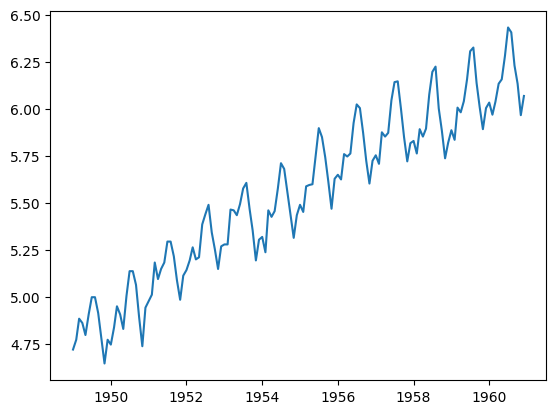

In [51]:
logged_data = np.log(data)
plt.plot(logged_data)

In [52]:
logged_data.columns

Index(['Passengers'], dtype='object')

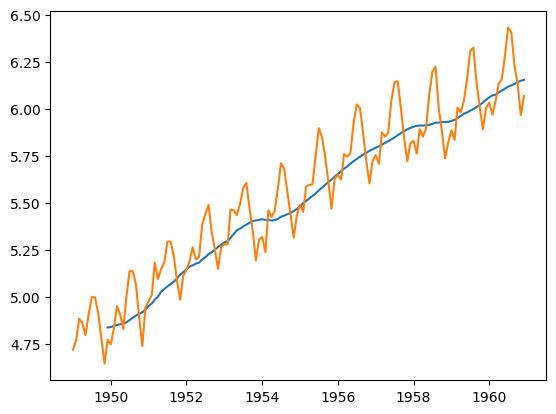

In [53]:
moving_average = logged_data.rolling(window= 12).mean()
moving_std = logged_data.rolling(window=12).std()

plt.plot(moving_average)
plt.plot(logged_data)

In [54]:
#removes the trend from the data, making it stationary or preparing it for further analysis.
Diff_data = Diff_data  - moving_average
Diff_data.dropna(inplace= True)
Diff_data.head()


,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [55]:
def test_stationarity(timeseries):

    #rolling statistics
    moving_average = timeseries.rolling(window = 12).mean()
    moving_std = timeseries.rolling(window = 12).std()

    #ploting the rolling statistics
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(moving_average, color = 'red', label = 'Moving Average')
    std = plt.plot(moving_std, color = 'black', label = 'Moving std')


    #ADF test
    print("The results of the ADF test")
    dftest = adfuller(timeseries['Passengers'], autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test statistic', 'P-values', '#lags used', 'Number of observations'])

     
    for key, value in dftest[4].items():#key, value: Represents the confidence levels (1%, 5%, 10%) and their corresponding critical values
        dfoutput[f'Critical Value in percentages ({key})'] = value

    print(dfoutput)
    


The results of the ADF test
Test statistic                          -3.162908
P-values                                 0.022235
#lags used                              13.000000
Number of observations                 119.000000
Critical Value in percentages (1%)      -3.486535
Critical Value in percentages (5%)      -2.886151
Critical Value in percentages (10%)     -2.579896
dtype: float64


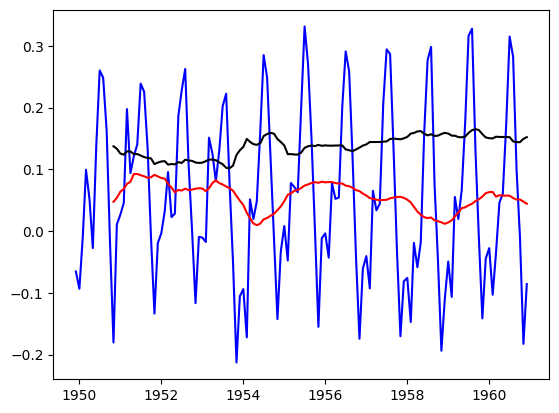

In [56]:
test_stationarity(Diff_data)

Here we can see that the test statistic has a low value compared to the Confidence values and the p - value is relatively low

Next we need to calculate the exponentially weighted average in the time series to figure out the trend present

The EWMA provides a smoother series, making it easier to observe trends over time

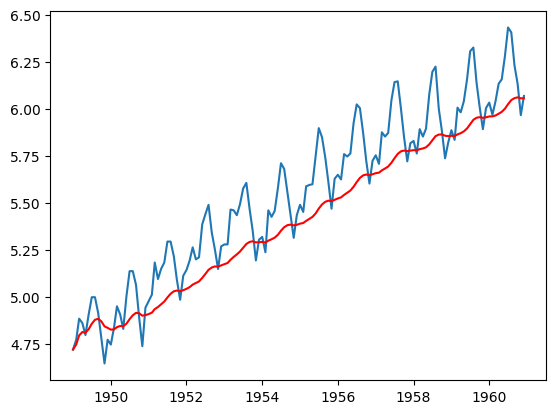

In [57]:
Weighted_average = logged_data.ewm(halflife= 12, min_periods = 0, adjust=True).mean()
#halflife=12: This parameter defines the time span (in your data's time units) in which the weights decay to half their initial value. A halflife of 12 means that after 12 time units, the weight assigned to a data point is halved
#min_periods=0: This allows the calculation to return a value even if there are fewer than 0 non-NaN observations.
#adjust=True: This means the weights are adjusted for all observations
plt.plot(logged_data)
plt.plot(Weighted_average, color = 'red')

The results of the ADF test
Test statistic                          -3.601262
P-values                                 0.005737
#lags used                              13.000000
Number of observations                 130.000000
Critical Value in percentages (1%)      -3.481682
Critical Value in percentages (5%)      -2.884042
Critical Value in percentages (10%)     -2.578770
dtype: float64


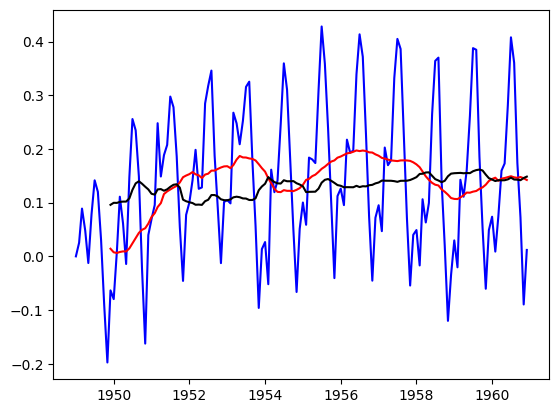

In [58]:
Diff_weighted_data = logged_data - Weighted_average
test_stationarity(Diff_weighted_data)

Here we see that the std is quite flat and the mean is better than the previous one
but the ts is larger than the values of the confidence inetrval, this means that the data is not stationary and that must be addresses

Now we need to shift the values into stationary 

The results of the ADF test
Test statistic                          -2.717131
P-values                                 0.071121
#lags used                              14.000000
Number of observations                 128.000000
Critical Value in percentages (1%)      -3.482501
Critical Value in percentages (5%)      -2.884398
Critical Value in percentages (10%)     -2.578960
dtype: float64


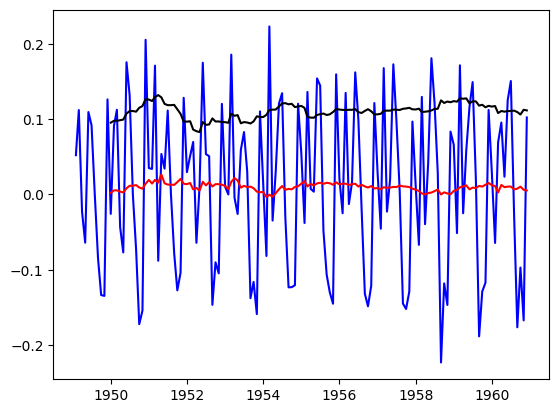

In [59]:
Diff_shifting_data = logged_data - logged_data.shift()
Diff_shifting_data.dropna(inplace = True)
test_stationarity(Diff_shifting_data)

# Seasonal Decomposition


useful for understanding the underlying components of the data, such as the trend, seasonal patterns, and residual noise

Trend: The long-term progression or direction of the data.
Seasonal: The repeating short-term cycle in the data (e.g., daily, monthly patterns).
Residual: The leftover noise after removing the trend and seasonal components

Understanding Components: Decomposing a time series helps you understand its components, which can inform your modeling approach. For example, you can decide if you need to account for seasonality or if you can model the trend separately.

Improving Model Accuracy: By analyzing the residuals, you can check if there are any patterns left in the data that should be modeled or accounted for, leading to better forecasting accuracy.

Stationarity: Ensuring that the residuals are stationary is crucial for many statistical methods. If the residuals are stationary, you can proceed with further analysis (like ARIMA modeling)

In [60]:
logged_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


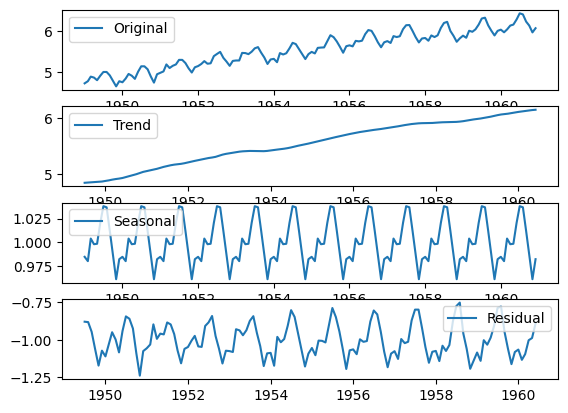

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(logged_data, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
observed = decomposition.observed
residual = observed - trend - seasonal

plt.subplot(4,1,1)
plt.plot(logged_data, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(4,1,4)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
residual.dropna(inplace = True)

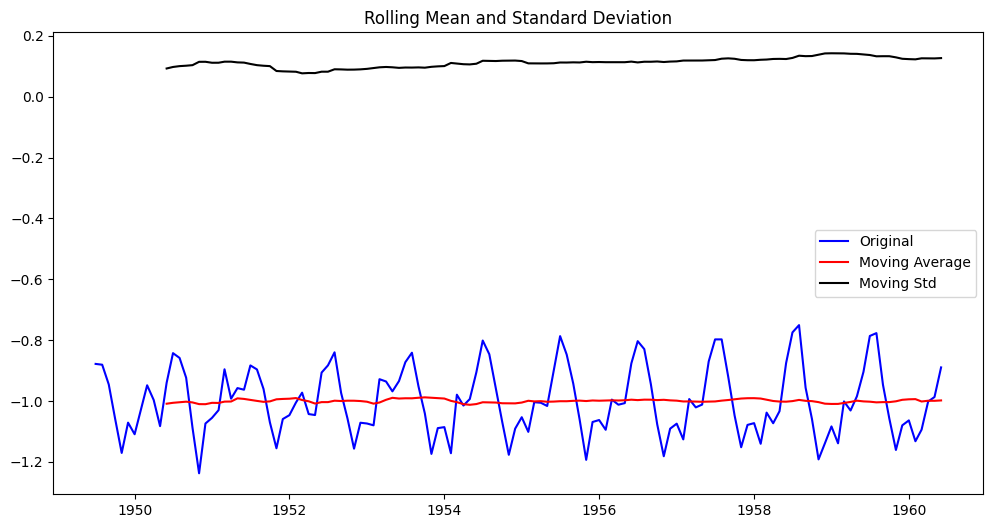

The results of the ADF test:
Test Statistic             -4.763795
P-Value                     0.000064
# Lags Used                13.000000
Number of Observations    118.000000
Critical Value (1%)        -3.487022
Critical Value (5%)        -2.886363
Critical Value (10%)       -2.580009
dtype: float64


In [64]:
def test_stationarity(timeseries):
    moving_average = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(moving_average, color='red', label='Moving Average')
    plt.plot(moving_std, color='black', label='Moving Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # ADF test directly on timeseries
    print("The results of the ADF test:")
    dftest = adfuller(timeseries, autolag='AIC')  # Use timeseries directly
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'P-Value', '# Lags Used', 'Number of Observations'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

# Call the function
test_stationarity(residual)


Test Statistic (-6.332387) is less than all critical values (1%, 5%, and 10%), suggesting strong evidence against the null hypothesis.

P-Value (2.885059e-08) is much lower than 0.05, indicating that we can confidently reject the null hypothesis.

The ADF test results imply that the residual time series is stationary. In the context of time series analysis, this means that the statistical properties of the series (such as mean, variance, and autocorrelation) do not change over time. This is an important property for many time series forecasting models, as they generally assume stationarity in the data.

If you're moving forward with modeling (e.g., ARIMA, SARIMA), this is a positive outcome, as stationary data often leads to more reliable forecasts

ACF AND PACF GRAPHS

Now that I have the P value how do I get the q and d

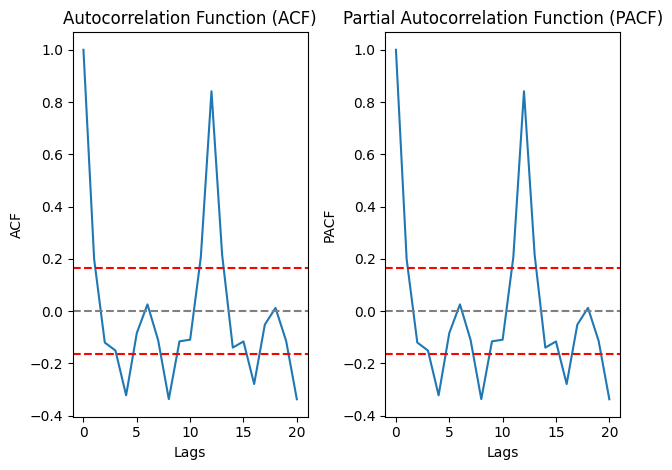

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(Diff_shifting_data, nlags = 20)
lag_pacf = acf(Diff_shifting_data, nlags = 20)

plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.title('Autocorrelation Function (ACF)')
plt.axhline(0, linestyle='--', color='gray')
plt.axhline(1.96/np.sqrt(len(Diff_shifting_data)), linestyle='--', color='red')  # 95% confidence interval
plt.axhline(-1.96/np.sqrt(len(Diff_shifting_data)), linestyle='--', color='red')
plt.xlabel('Lags')
plt.ylabel('ACF')

plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function (PACF)')
plt.axhline(0, linestyle='--', color='gray')
plt.axhline(1.96/np.sqrt(len(Diff_shifting_data)), linestyle='--', color='red')  # 95% confidence interval
plt.axhline(-1.96/np.sqrt(len(Diff_shifting_data)), linestyle='--', color='red')
plt.xlabel('Lags')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()


How do you choose between p and q?

You look at where the lags drops off to zero, in my case p = 2 and q = 2

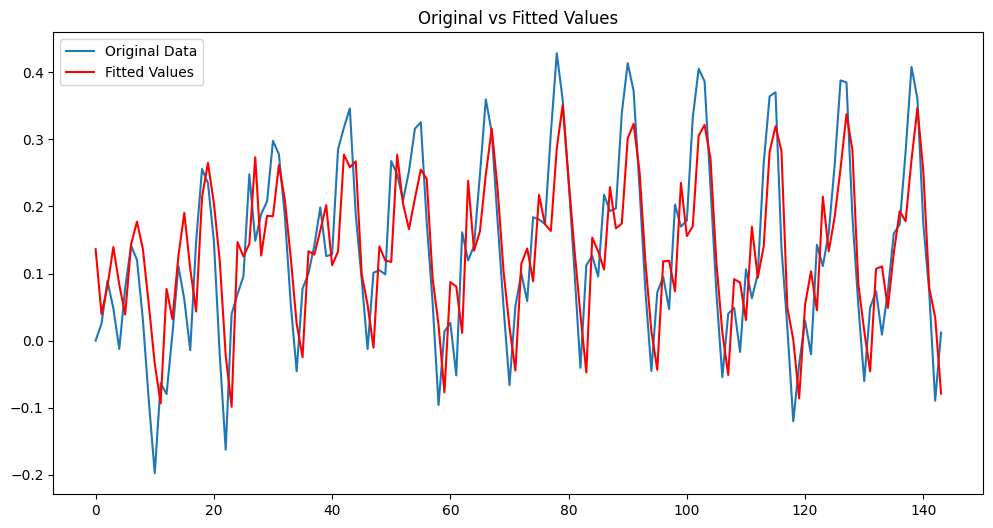

Differenced Data RSS: 1.0510742859773683


c:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


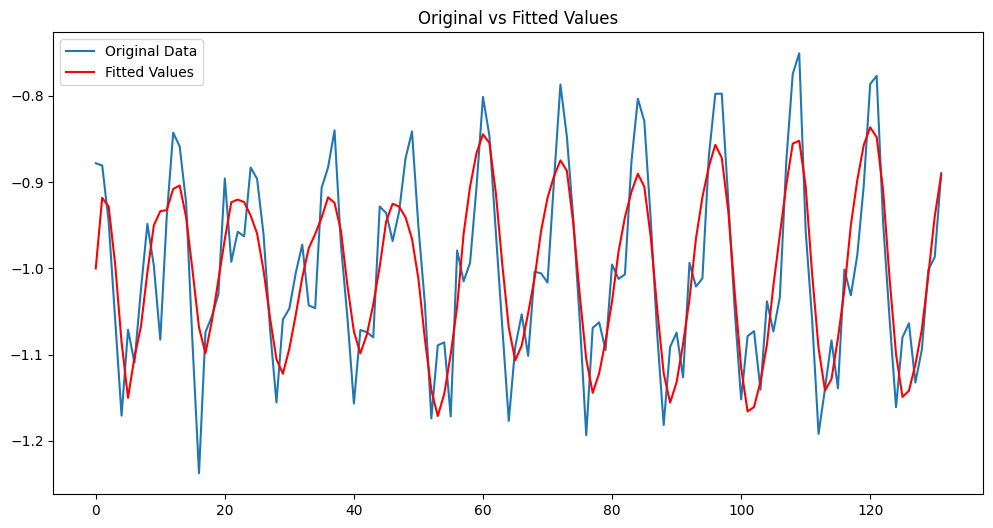

Residual Data RSS: 0.4735721845879006


In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Function to test stationarity
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]  # Return p-value

# Function to fit ARIMA and calculate RSS
def fit_arima_and_calculate_rss(data, order=(2, 0, 2)):
    # Fit ARIMA model
    model = ARIMA(data, order=order)
    results = model.fit()
    
    # Calculate RSS
    residuals = results.resid
    rss = np.sum(np.square(residuals))
    
    # Plot original data and fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Original Data')
    plt.plot(results.fittedvalues, color='red', label='Fitted Values')
    plt.title('Original vs Fitted Values')
    plt.legend()
    plt.show()
    
    return results, rss

# Replace these with your actual data
logged_data = pd.Series(logged_data.values.flatten())  # Convert to 1D if 2D
Diff_weighted_data = pd.Series(Diff_weighted_data.values.flatten())  # Convert to 1D if 2D
residual = pd.Series(residual.values.flatten())

# Fit ARIMA and calculate RSS for logged data
p_value_logged = test_stationarity(logged_data) #test whether the logged_data is stationary or not
if p_value_logged < 0.05:  # If p-value is less than 0.05, data is stationary
    results_logged, rss_logged = fit_arima_and_calculate_rss(logged_data)
    print(f"Logged Data RSS: {rss_logged}")

# Fit ARIMA and calculate RSS for differenced data
p_value_diff = test_stationarity(Diff_weighted_data)
if p_value_diff < 0.05:  # If p-value is less than 0.05, data is stationary
    results_diff, rss_diff = fit_arima_and_calculate_rss(Diff_weighted_data)
    print(f"Differenced Data RSS: {rss_diff}")

# Fit ARIMA and calculate RSS for residual data
p_value_residual = test_stationarity(residual)
if p_value_residual < 0.05:  # If p-value is less than 0.05, data is stationary
    results_residual, rss_residual = fit_arima_and_calculate_rss(residual)
    print(f"Residual Data RSS: {rss_residual}")
else:
    print("Residual data is not stationary.")


CONCLUSION

Lower RSS = Better Fit: Since the RSS for the differenced data (1.1324) is smaller than that for the residual data (1.561313), it indicates that the ARIMA model fits the differenced data better than the residual data.

Differencing the Data: This suggests that differencing the time series (removing trends or seasonality) might have been the more effective transformation to achieve stationarity and improve the ARIMA model's performance

# HOW DO YOU PREDICT USING THE DIFFERENCING??!


In [74]:
steps = 10

forecast_diff = results_diff.forecast(steps= steps)
print(f"Predicted differenced values: {forecast_diff}")

Predicted differenced values: 144    0.081331
145    0.130336
146    0.163060
147    0.176981
148    0.175340
149    0.164213
150    0.149913
151    0.137281
152    0.128966
153    0.125544
Name: predicted_mean, dtype: float64


Since the ARIMA model is based on differenced data, you need to add back the last value from your original data (before differencing) to each predicted value. This will "rebuild" the predictions to be on the original scale

In [75]:
last_original_value = logged_data.iloc[-1]

forecast_original_scale = np.cumsum(forecast_diff) + last_original_value

print(f"Predicted values on the original scale: {forecast_original_scale}")

Predicted values on the original scale: 144    6.149756
145    6.280092
146    6.443152
147    6.620134
148    6.795474
149    6.959687
150    7.109600
151    7.246881
152    7.375846
153    7.501391
Name: predicted_mean, dtype: float64


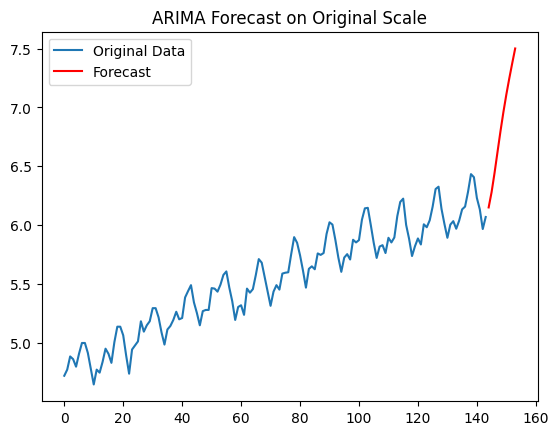

In [76]:
# Plot the original data
plt.plot(logged_data, label='Original Data')

# Plot the forecasted values (on the original scale)
plt.plot(np.arange(len(logged_data), len(logged_data) + steps), forecast_original_scale, color='red', label='Forecast')

plt.title('ARIMA Forecast on Original Scale')
plt.legend()
plt.show()
